# CNN With Keras

In [149]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import (Input, ZeroPadding2D, Conv2D,
                                            BatchNormalization, MaxPooling2D,
                                            Dense, Flatten)
from tensorflow.python.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

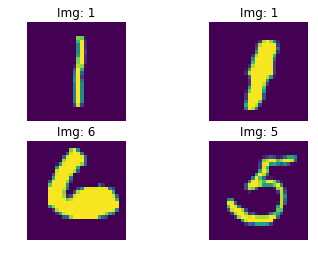

In [135]:
np.random.seed(31415)
fig = plt.figure()
samp_ixs = np.random.randint(0, X_train.shape[0], size=4)
for ix, img_ix in enumerate(samp_ixs):
    ax = fig.add_subplot(2, 2, ix + 1)
    ax.imshow(X_train[img_ix])
    ax.set_title(f"Img: {y_train[img_ix]}")
    ax.axis("off")

In [136]:
X_train, X_test = X_train.reshape(-1, 28, 28, 1) / 255.0, X_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
X_train, X_cv = X_train[:59000], X_train[59000:]
y_train, y_cv = y_train[:59000], y_train[59000:]

In [137]:
X_input = Input((28, 28, 1))
X = ZeroPadding2D((3, 3))(X_input)
X = Conv2D(32, (7, 7), name="conv0")(X)
X = BatchNormalization(axis=3, name="bn0")(X)
X = Activation("relu")(X)
X = MaxPooling2D(pool_size=(2, 2))(X)
X = Flatten()(X)
X = Dense(10, activation="softmax", name="output")(X)

model = Model(inputs=X_input, outputs=X)

In [138]:
model.compile("Adam", "categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(-1, 28, 28, 1), y_train)

Epoch 1/1
59000/59000 [==============================]59000/59000 [==============================] - 72s 1ms/step - loss: 0.1536 - acc: 0.9529



In [146]:
y_pred_cv = model.predict(X_cv).argmax(axis=1)
y_cv = y_cv.argmax(axis=1)

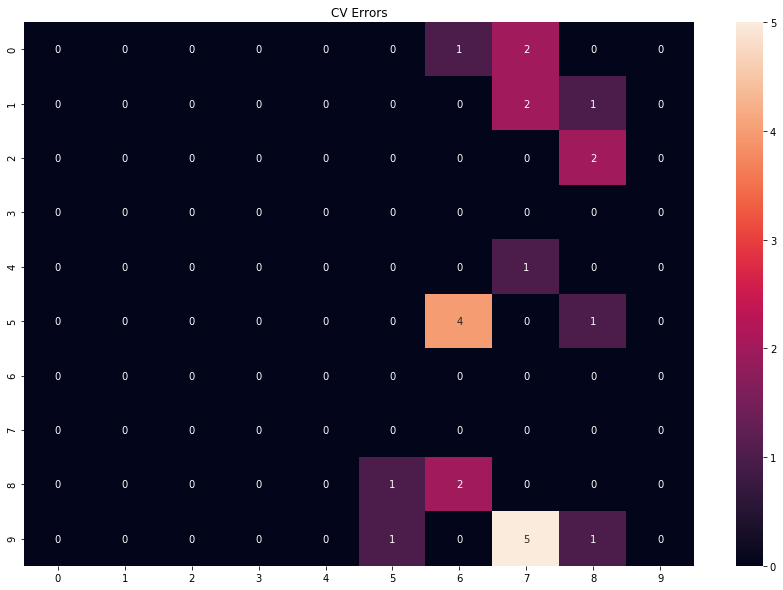

In [169]:
cm = confusion_matrix(y_cv, y_pred_cv)
cm = cm * (1 - np.identity(len(cm)))
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.title("CV Errors");

In [186]:
where_errs = y_pred_cv != y_cv
X_errs = X_cv[where_errs]
y_true_errs = y_cv[where_errs]
y_pred_errs = y_pred_cv[where_errs]

In [187]:
y_true_errs

array([8, 8, 9, 1, 5, 0, 9, 0, 0, 5, 8, 9, 2, 5, 5, 5, 2, 1, 9, 9, 4, 1, 9,
       9])

In [188]:
y_pred_errs

array([6, 6, 8, 8, 8, 7, 7, 7, 6, 6, 5, 5, 8, 6, 6, 6, 8, 7, 7, 7, 7, 7, 7,
       7])

In [198]:
import pandas as pd
pd.DataFrame(np.c_[y_true_errs, y_pred_errs], columns=["True", "Pred"])

,True,Pred
0,8,6
1,8,6
2,9,8
3,1,8
4,5,8
5,0,7
6,9,7
7,0,7
8,0,6
9,5,6


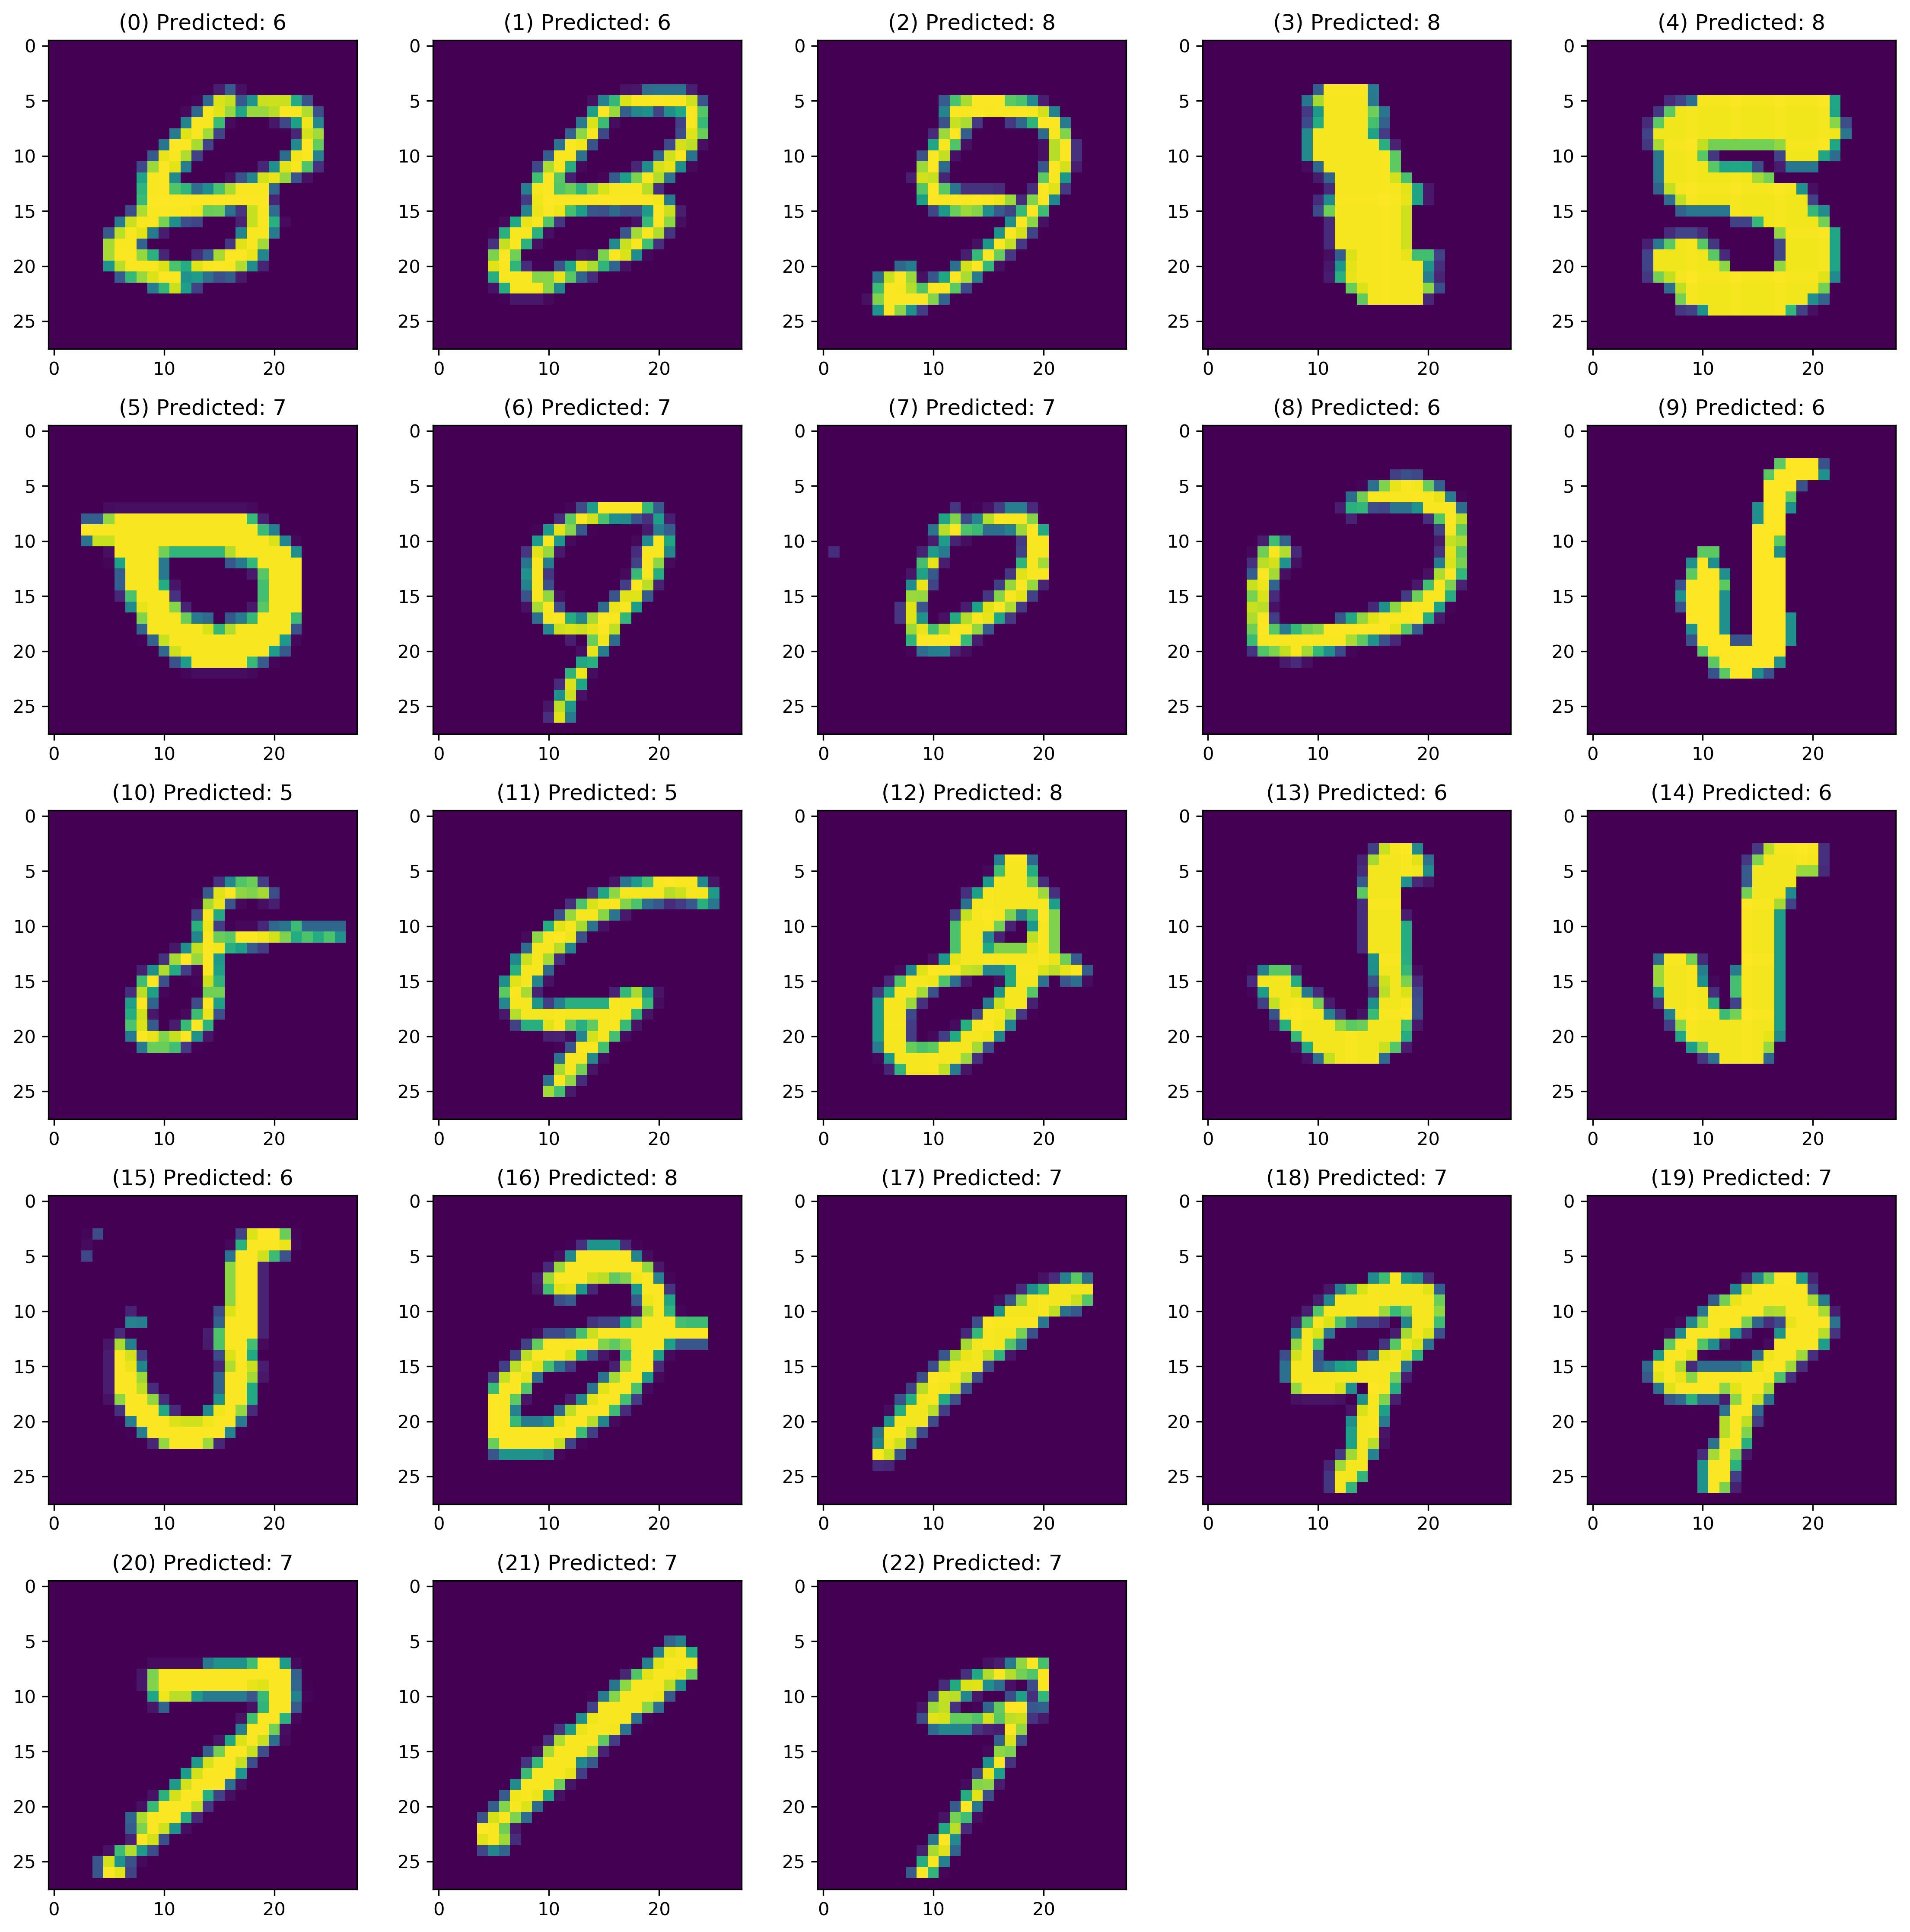

In [206]:
fig = plt.figure(figsize=(15,15), dpi=300)
for i in range(23):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.set_title(f"({i}) Predicted: {y_pred_errs[i]}")
    ax.imshow(X_errs[i].reshape(28,28))
    
plt.tight_layout()

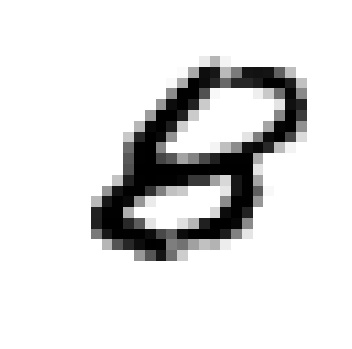

In [221]:
## (0)
plt.figure(dpi=100)
plt.imshow(X_errs[0].reshape(28, 28), cmap="gray_r")
plt.axis("off");

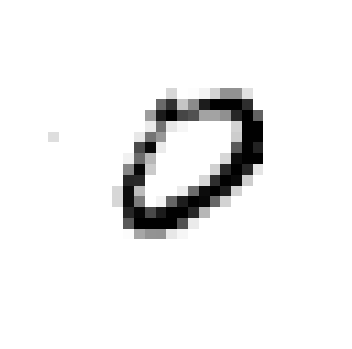

In [222]:
## (7)
plt.figure(dpi=100)
plt.imshow(X_errs[7].reshape(28, 28), cmap="gray_r")
plt.axis("off");

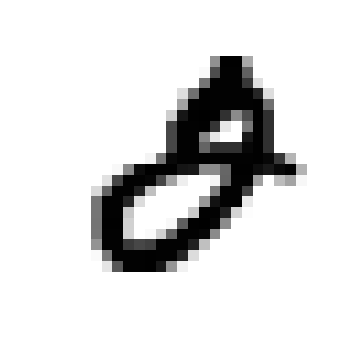

In [223]:
## (12)
plt.figure(dpi=100)
plt.imshow(X_errs[12].reshape(28, 28), cmap="gray_r")
plt.axis("off");

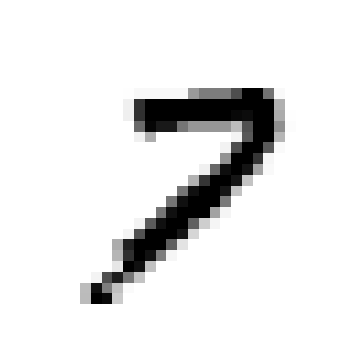

In [224]:
## (20)
plt.figure(dpi=100)
plt.imshow(X_errs[20].reshape(28, 28), cmap="gray_r")
plt.axis("off");